# Intro to Regression with Neural Networks in Tensorflow
* Making prediction from the relationship between the dependent and independent variables

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-12-12 16:54:18.090673: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 16:54:18.090751: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 16:54:19.698908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-12 16:54:19.699806: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-12 16:54:19.699817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

        #creating some data
    
#creating Features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


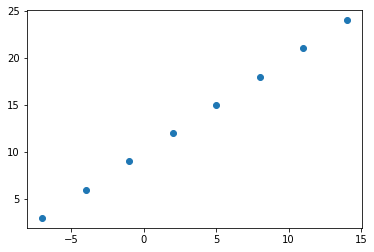

In [3]:
#visualize it
plt.scatter(X,y)

In [4]:
#relstioship
X+10
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

shapes varies depending n the problem
* problem like housing with features like nbed,utilities and garage as features will require a shape of 3
[bed,utility,garage]
Shape=[3]


In [5]:
#create  a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

2022-12-08 16:18:55.300747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 16:18:55.300793: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 16:18:55.300828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [7]:
#turn our numpy array into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modeling in Tensorflow
* Create  a model - define  the input and output layers,as well as the hidden layers of a deep learning model

>sequential

>functional


* Compile a model- 

>define the loss function (in other words , the functio which tells our model how wrong it is) and 

>the optimizer (tells our model how to improve the patterns its learning) and

>evaluate metrics (what we  can use to interpret the performance of our model)

* Fitting a model- letting the model try  to find patterns between  X & y( features and labels)

              
#Fit The model
model.fit(x=X,
          y=y,
          epochs=30,
          shuffle=True,
          )

NameError: name 'model' is not defined

#check out X and y
X,y

 try predict
y_pred=model.predict([6.0,7.0,5.0,17.0])
y_pred

# Improving on model

 We can improve our model by altering the steps we took to create a model.
1. **create amodel** - here we might add more layers ,increase the numberof hidden units (all called neurons) within each of the hidden layers,change the activation fucntions of each layer.
2. **Compiling a model** here we might change the optimizeation functions or perhaps the learning rate of the optimization functions.
3. **Fitting a model** - here we might fit a model more epochs (leave it training for longer)or on more data(giving the model examples to learn from

* **Note !**

**Hyperperimeter** is like a dial in the neural network that can be adjusted to see how it improves, where as the perimeter is usually the patterns and neural

In [ ]:
# Hyperimeter

In [ ]:

#Trying   crete the model again

#create the model 
model = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=1)
    
])

# compile the model
model.compile(loss="mae",
              optimizer=tf.optimizers.Adam(learning_rate=0.01),#SGD() , ,
              metrics=['mae']

)


#Fit the model
model.fit(X,
         y,
         epochs=100)

In [ ]:
y_pred=model.predict([17.0,12.0,6.0,5.0,100.0,1.0])
y_pred

In [ ]:
model.summary()

## over fitting 
learning th patterns in the traing ning data too well
 we dont evalutae our model bases on the metrics on thre training data but te metrics on the data not seen before

##some changes we did to improve the model
* Adding a new  layer
*increase the number of hidden units
*change activation functions
*change the optimization
*change learning rate ###most important hyperperemeter change of many neuron network
*Fiting in more data sets

# EVALUATING  A MODEL

**IN PRACTICE , A TIPICAL WORK FLOW WILL BE**
```
Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ... ```

# Note
* When Building a medl you have :experiment, experiment, experiment.
* When it comes to evaluating:visualize, visualize, visualize

 **Visualize:**
 
 * **The Data**- what data are we working with ? what does it look like?
 * **The model itself** What does our model look like?
 * **The training of a model** - how long does a model perform while it  learns
 * **The prediction of the model**- how do hte prediction of a model line up against the ground truth (acual)
 

# Next Dataset

In [4]:
X=tf.range(-100,100,5)
X

2022-12-12 16:54:57.950206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-12 16:54:57.950694: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 16:54:57.950739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [5]:
y=X+10
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

 # The 3 set
 * **Training dataset-70-80%:** ThE model learns from this data 
 * **Validation set- 10-15%** Model gets tuned on this dataset.Testing  on  how the teak affected the model on this data set
 * **Testing dataset- 10-15%**-gets evaluated o this data to test what it has learned.
 
 
 **aim**
 we aim for generalisation ofthe model.
 Being able to perfom well on dT it hasnt seen before

In [5]:
len(X)

40

In [6]:
#Split the data into train and test
X_train = X[:30] #first 40 are traing samples 
y_train = y[:30]

X_test = X[30:] #last 10 are testing samples
y_test = y[30:]
len(X_test), len(y_test)

(10, 10)

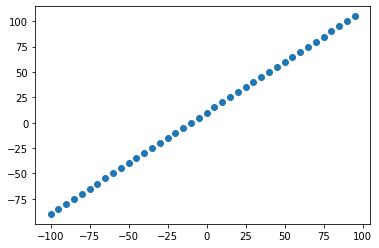

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

## visualising  the data
Now we've got our data in training and testing sets... lets visualize it again


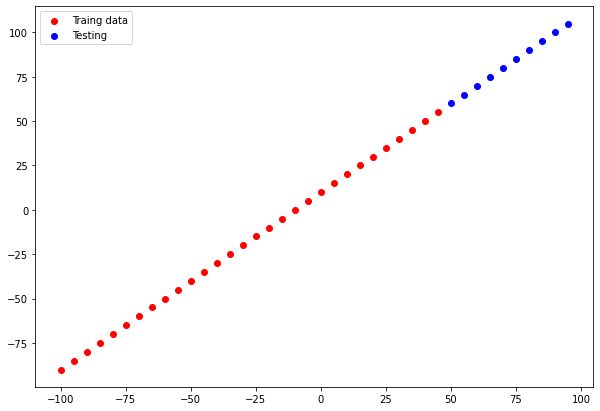

In [8]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train,y_train, c="r",label="Traing data")

#plottest data in Green
plt.scatter(X_test,y_test, c='b',label="Testing")
#show a legend
plt.legend();

In [9]:
X_train[:100]

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45], dtype=int32)>

In [10]:
X_train.ndim,X_train.shape,tf.size(X_train)

(1, TensorShape([30]), <tf.Tensor: shape=(), dtype=int32, numpy=30>)

In [10]:
#bulding the neursl network for the data
# Build model
# tf.random.set_seed(42)
model=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1,name='output_layer')
    
],name="model_0")


#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Adam(lr=0.01),
              metrics=["mae"]
)




In [11]:
#fit model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0
)


# Model summary

In [13]:
#visualize model
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Dense** means a **fully connected layer**

* Total params - total number of parameters in the model.
* Trainable parameters- these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters arean't updated  during training (this is typical when you bring in already learn patterns or parameters from the other models during **transfer learning**  


**Reasource** For more indepth overview of parameter within a layer, check out MIT's introduction to deep learning vidoe.

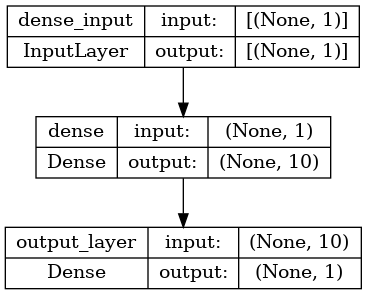

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualizeour model predictions

To visualize predictions , it's a god idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred(ground truth versus your model

In [12]:
#Make Some Prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 91ms/step


array([[ 57.83382 ],
       [ 63.515648],
       [ 69.19748 ],
       [ 74.87929 ],
       [ 80.56111 ],
       [ 86.242935],
       [ 91.92476 ],
       [ 97.60659 ],
       [103.28841 ],
       [108.97023 ]], dtype=float32)

In [13]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

**Note:** if you  feel like you're going to use some kind of functionality in the future , its a good idea to turn it into a function 

# Plotting function 

In [14]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

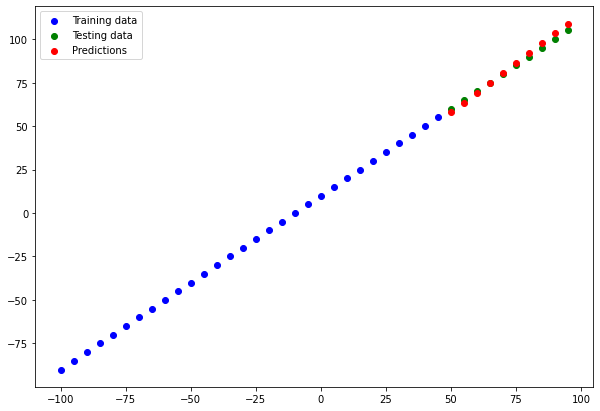

In [15]:
plot_pred()

## EVALUTIOIN OF MODEL

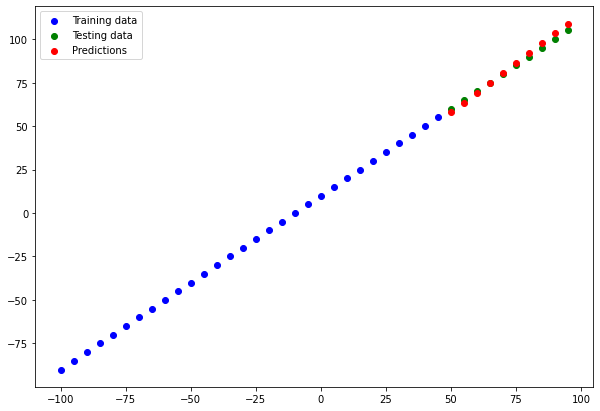

In [16]:
plot_pred()

## Evaluating our model's predictions with regression evelauation metrics

Depending on the problem you'r working on , there will be different evalution metrics to evaluate your model's performance.

Since we're working on a regression , two of the main metrics:
* **MAE** - MEAN ABSOLUTE ERROR, on  average , how wrong is each of my model's predictions.
>as a great starter metrics for any regression problems

* **MSE** - mean square error, square the average errors.
>use this when large errors are more significant than smaller errors
* **Huber** -tf.keras.losses.huber()
>combination of MSE and MAE .less sensitive to outliers than MSE


# First one:

In [17]:
  #Evaluate the model on the test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 134ms/step - loss: 1.8168 - mae: 1.8168


[1.816781997680664, 1.816781997680664]

# Second option:

**CALCULATE THE MAE:**
this result should be a scaler value since it adds all records and performs the mae like the result of **model.evaluate(X_test,y_test)**

In [18]:
#ans is tensor array
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.66618 , 19.68748 , 15.981512, 13.548285, 12.5     , 12.748587,
       14.269903, 17.063953, 21.130726, 26.47023 ], dtype=float32)>

In [19]:
#ans is also a tensor array
mae=tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.66618 , 19.68748 , 15.981512, 13.548285, 12.5     , 12.748587,
       14.269903, 17.063953, 21.130726, 26.47023 ], dtype=float32)>

In [20]:
y_pred

array([[ 57.83382 ],
       [ 63.515648],
       [ 69.19748 ],
       [ 74.87929 ],
       [ 80.56111 ],
       [ 86.242935],
       [ 91.92476 ],
       [ 97.60659 ],
       [103.28841 ],
       [108.97023 ]], dtype=float32)

In [21]:
#turn y_pred into a tensor
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 57.83382 ],
       [ 63.515648],
       [ 69.19748 ],
       [ 74.87929 ],
       [ 80.56111 ],
       [ 86.242935],
       [ 91.92476 ],
       [ 97.60659 ],
       [103.28841 ],
       [108.97023 ]], dtype=float32)>

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

we have to **reshape our tensors** in order to do perform a **dot product**

Our **y_pred tensor** has an extra dimention compared to the **y_test**  so we **squeeze the y_pred tensor**


In [23]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 57.83382 ,  63.515648,  69.19748 ,  74.87929 ,  80.56111 ,
        86.242935,  91.92476 ,  97.60659 , 103.28841 , 108.97023 ],
      dtype=float32)>

In [24]:
#calculating the MAE again 
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.8167797>

**Calculating the MSE**

In [25]:
#Calculate the mean square error
mse=tf.keras.losses.MSE(y_test,
                    tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.6489334>

In [26]:
#make functions of MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))



def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


### Running  experiments to improve our model 
```Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ...```


1. `model_1` - same as original model ,1 layer ,trianed for 150 epochs
2. `model_2` -2 layers, trained for 100 epochs
3. `model_3` -2 layers ,trained for 500 epochs


**Bulid Model_1**

In [27]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae']
    
)

#fit model
model_1.fit(X_train,
          y_train,
          epochs=150,
          
)

Epoch 1/150
1/1 [==============================] - 0s 346ms/step - loss: 64.3332 - mae: 64.3332
Epoch 2/150
1/1 [==============================] - 0s 7ms/step - loss: 21.2337 - mae: 21.2337
Epoch 3/150
1/1 [==============================] - 0s 12ms/step - loss: 22.2888 - mae: 22.2888
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 24.0052 - mae: 24.0052
Epoch 5/150
1/1 [==============================] - 0s 12ms/step - loss: 12.4722 - mae: 12.4722
Epoch 6/150
1/1 [==============================] - 0s 16ms/step - loss: 19.3790 - mae: 19.3790
Epoch 7/150
1/1 [==============================] - 0s 9ms/step - loss: 14.5574 - mae: 14.5574
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 16.3819 - mae: 16.3819
Epoch 9/150
1/1 [==============================] - 0s 9ms/step - loss: 15.6258 - mae: 15.6258
Epoch 10/150
1/1 [==============================] - 0s 9ms/step - loss: 14.8112 - mae: 14.8112
Epoch 11/150
1/1 [==============================] - 0

1/1 [==============================] - 0s 6ms/step - loss: 13.1510 - mae: 13.1510
Epoch 88/150
1/1 [==============================] - 0s 8ms/step - loss: 14.8112 - mae: 14.8112
Epoch 89/150
1/1 [==============================] - 0s 9ms/step - loss: 13.8676 - mae: 13.8676
Epoch 90/150
1/1 [==============================] - 0s 7ms/step - loss: 14.2519 - mae: 14.2519
Epoch 91/150
1/1 [==============================] - 0s 8ms/step - loss: 14.6034 - mae: 14.6034
Epoch 92/150
1/1 [==============================] - 0s 8ms/step - loss: 15.6968 - mae: 15.6968
Epoch 93/150
1/1 [==============================] - 0s 7ms/step - loss: 12.6354 - mae: 12.6354
Epoch 94/150
1/1 [==============================] - 0s 7ms/step - loss: 15.1502 - mae: 15.1502
Epoch 95/150
1/1 [==============================] - 0s 10ms/step - loss: 13.3540 - mae: 13.3540
Epoch 96/150
1/1 [==============================] - 0s 7ms/step - loss: 14.5892 - mae: 14.5892
Epoch 97/150
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 63ms/step


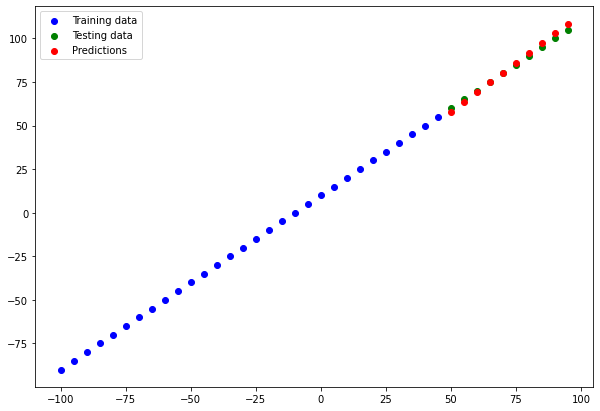

In [28]:
#Visualize predictions for model_1
y_pred_1 = model_1.predict(X_test)

plot_pred(predictions=y_pred_1)



In [29]:
#calculating model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1= mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6423786>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.6996536>)

**model_2**

In [30]:
#set random seed
tf.random.set_seed(42)

#build model
model_2=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=5),
    Dense(units=1)
])
 #compile Model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)


#Fit model_2
model_2.fit(X_train,
            y_train,
            epochs=50
)

Epoch 1/50
1/1 [==============================] - 0s 395ms/step - loss: 38.8681 - mae: 38.8681
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 97.5014 - mae: 97.5014
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 38.8949 - mae: 38.8949
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 32.7804 - mae: 32.7804
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 22.2513 - mae: 22.2513
Epoch 6/50
1/1 [==============================] - 0s 13ms/step - loss: 13.0200 - mae: 13.0200
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 26.0081 - mae: 26.0081
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 7.9168 - mae: 7.9168
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 30.2017 - mae: 30.2017
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 32.1686 - mae: 32.1686
Epoch 11/50
1/1 [==============================] - 0s 7ms/step -

1/1 [==============================] - 0s 65ms/step


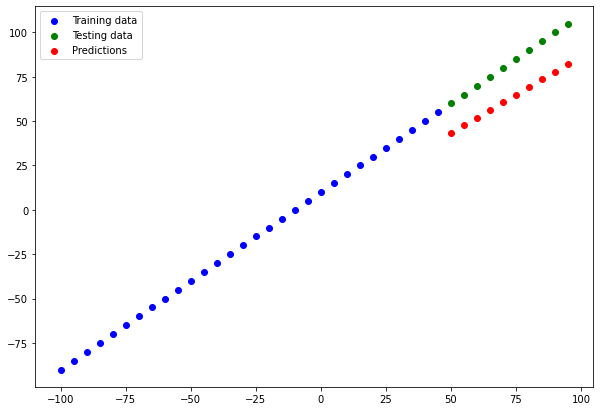

In [31]:
#visualize plot predictionns for model_2
y_pred_2=  model_2.predict(X_test)
plot_pred(predictions=y_pred_2)

In [32]:
#calculating model_2 evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2= mse(y_test,y_pred_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=19.749924>,
 <tf.Tensor: shape=(), dtype=float32, numpy=394.1047>)

**model_3**


In [33]:
#bulding the neursl network for the data
# Build model
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=1)
    
])


#compile model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #Adam(lr=0.01),
              metrics=["mae"]
)

model_3.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
1/1 [==============================] - 0s 494ms/step - loss: 47.8856 - mae: 47.8856
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 47.3637 - mae: 47.3637
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 46.8422 - mae: 46.8422
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 46.3213 - mae: 46.3213
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 45.8008 - mae: 45.8008
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 45.2806 - mae: 45.2806
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 44.7608 - mae: 44.7608
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 44.2412 - mae: 44.2412
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 43.7219 - mae: 43.7219
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 43.2027 - mae: 43.2027
Epoch 11/1000
1/1 [==========================

1/1 [==============================] - 0s 7ms/step - loss: 4.6363 - mae: 4.6363
Epoch 87/1000
1/1 [==============================] - 0s 11ms/step - loss: 4.4275 - mae: 4.4275
Epoch 88/1000
1/1 [==============================] - 0s 9ms/step - loss: 4.2971 - mae: 4.2971
Epoch 89/1000
1/1 [==============================] - 0s 8ms/step - loss: 4.2266 - mae: 4.2266
Epoch 90/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.2244 - mae: 4.2244
Epoch 91/1000
1/1 [==============================] - 0s 6ms/step - loss: 4.2726 - mae: 4.2726
Epoch 92/1000
1/1 [==============================] - 0s 8ms/step - loss: 4.3473 - mae: 4.3473
Epoch 93/1000
1/1 [==============================] - 0s 10ms/step - loss: 4.4380 - mae: 4.4380
Epoch 94/1000
1/1 [==============================] - 0s 6ms/step - loss: 4.5379 - mae: 4.5379
Epoch 95/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.6072 - mae: 4.6072
Epoch 96/1000
1/1 [==============================] - 0s 9ms/step - loss:

1/1 [==============================] - 0s 9ms/step - loss: 3.9943 - mae: 3.9943
Epoch 173/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.9914 - mae: 3.9914
Epoch 174/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.9885 - mae: 3.9885
Epoch 175/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.9855 - mae: 3.9855
Epoch 176/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.9825 - mae: 3.9825
Epoch 177/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.9806 - mae: 3.9806
Epoch 178/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.9774 - mae: 3.9774
Epoch 179/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.9742 - mae: 3.9742
Epoch 180/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.9716 - mae: 3.9716
Epoch 181/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.9689 - mae: 3.9689
Epoch 182/1000
1/1 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 8ms/step - loss: 3.7585 - mae: 3.7585
Epoch 259/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.7556 - mae: 3.7556
Epoch 260/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.7528 - mae: 3.7528
Epoch 261/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.7502 - mae: 3.7502
Epoch 262/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.7473 - mae: 3.7473
Epoch 263/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.7446 - mae: 3.7446
Epoch 264/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.7419 - mae: 3.7419
Epoch 265/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.7391 - mae: 3.7391
Epoch 266/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.7361 - mae: 3.7361
Epoch 267/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.7332 - mae: 3.7332
Epoch 268/1000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 12ms/step - loss: 3.5050 - mae: 3.5050
Epoch 345/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.5022 - mae: 3.5022
Epoch 346/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.4993 - mae: 3.4993
Epoch 347/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.4964 - mae: 3.4964
Epoch 348/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.4933 - mae: 3.4933
Epoch 349/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4901 - mae: 3.4901
Epoch 350/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4869 - mae: 3.4869
Epoch 351/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.4836 - mae: 3.4836
Epoch 352/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4802 - mae: 3.4802
Epoch 353/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4768 - mae: 3.4768
Epoch 354/1000
1/1 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 8ms/step - loss: 3.2211 - mae: 3.2211
Epoch 431/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.2175 - mae: 3.2175
Epoch 432/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.2138 - mae: 3.2138
Epoch 433/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2101 - mae: 3.2101
Epoch 434/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2062 - mae: 3.2062
Epoch 435/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2023 - mae: 3.2023
Epoch 436/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.1993 - mae: 3.1993
Epoch 437/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.1953 - mae: 3.1953
Epoch 438/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.1917 - mae: 3.1917
Epoch 439/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.1884 - mae: 3.1884
Epoch 440/1000
1/1 [==============================] - 0s 9ms/st

1/1 [==============================] - 0s 10ms/step - loss: 2.8565 - mae: 2.8565
Epoch 517/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.8502 - mae: 2.8502
Epoch 518/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.8433 - mae: 2.8433
Epoch 519/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8358 - mae: 2.8358
Epoch 520/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8272 - mae: 2.8272
Epoch 521/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8192 - mae: 2.8192
Epoch 522/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8072 - mae: 2.8072
Epoch 523/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.7980 - mae: 2.7980
Epoch 524/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.7916 - mae: 2.7916
Epoch 525/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.7843 - mae: 2.7843
Epoch 526/1000
1/1 [==============================] - 0s 10ms/

1/1 [==============================] - 0s 8ms/step - loss: 2.2473 - mae: 2.2473
Epoch 603/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.2388 - mae: 2.2388
Epoch 604/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.2302 - mae: 2.2302
Epoch 605/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.2214 - mae: 2.2214
Epoch 606/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.2164 - mae: 2.2164
Epoch 607/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2078 - mae: 2.2078
Epoch 608/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.1964 - mae: 2.1964
Epoch 609/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.1896 - mae: 2.1896
Epoch 610/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.1802 - mae: 2.1802
Epoch 611/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.1717 - mae: 2.1717
Epoch 612/1000
1/1 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 9ms/step - loss: 1.3024 - mae: 1.3024
Epoch 689/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.2921 - mae: 1.2921
Epoch 690/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2766 - mae: 1.2766
Epoch 691/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2644 - mae: 1.2644
Epoch 692/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.2508 - mae: 1.2508
Epoch 693/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.2374 - mae: 1.2374
Epoch 694/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.2243 - mae: 1.2243
Epoch 695/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.2109 - mae: 1.2109
Epoch 696/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.1978 - mae: 1.1978
Epoch 697/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.1845 - mae: 1.1845
Epoch 698/1000
1/1 [==============================] - 0s 8ms

1/1 [==============================] - 0s 8ms/step - loss: 0.2117 - mae: 0.2117
Epoch 775/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3116 - mae: 0.3116
Epoch 776/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1578 - mae: 0.1578
Epoch 777/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0646 - mae: 0.0646
Epoch 778/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1257 - mae: 0.1257
Epoch 779/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3592 - mae: 0.3592
Epoch 780/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3035 - mae: 0.3035
Epoch 781/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2051 - mae: 0.2051
Epoch 782/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1823 - mae: 0.1823
Epoch 783/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2338 - mae: 0.2338
Epoch 784/1000
1/1 [==============================] - 0s 8ms/st

1/1 [==============================] - 0s 9ms/step - loss: 0.1198 - mae: 0.1198
Epoch 861/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0834 - mae: 0.0834
Epoch 862/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1498 - mae: 0.1498
Epoch 863/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1316 - mae: 0.1316
Epoch 864/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0983 - mae: 0.0983
Epoch 865/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1027 - mae: 0.1027
Epoch 866/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1657 - mae: 0.1657
Epoch 867/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1161 - mae: 0.1161
Epoch 868/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1739 - mae: 0.1739
Epoch 869/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1944 - mae: 0.1944
Epoch 870/1000
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 11ms/step - loss: 0.0449 - mae: 0.0449
Epoch 947/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0508 - mae: 0.0508
Epoch 948/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1090 - mae: 0.1090
Epoch 949/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0894 - mae: 0.0894
Epoch 950/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0989 - mae: 0.0989
Epoch 951/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1109 - mae: 0.1109
Epoch 952/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0928 - mae: 0.0928
Epoch 953/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0666 - mae: 0.0666
Epoch 954/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1328 - mae: 0.1328
Epoch 955/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1013 - mae: 0.1013
Epoch 956/1000
1/1 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 25ms/step


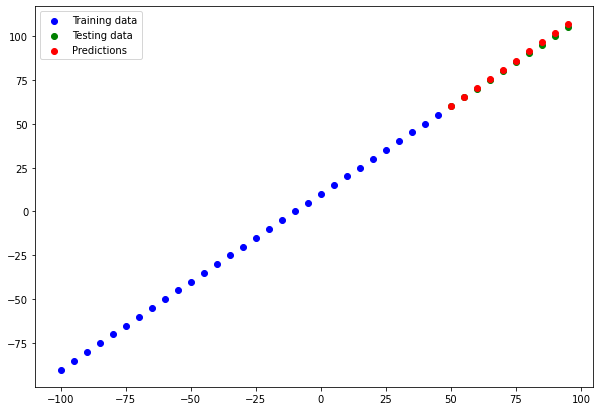

In [55]:
#visualize plot predictionns for model_3
y_pred_3=  model_3.predict(X_test)
plot_pred(predictions=y_pred_3)

In [35]:
#calculating model_2 evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3= mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8474518>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.1734298>)

# Comparing The results of our experiments


In [36]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results =[['model_1',mae_1,mse_1],
               ['model_2',mae_2,mse_2],
               ['model_3',mae_3,mse_3]]

all_results = pd.DataFrame(model_results,columns =["Models","MSE ","MAE"])
all_results

,Models,MSE,MAE
0,model_1,"tf.Tensor(1.6423786, shape=(), dtype=float32)","tf.Tensor(3.6996536, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(19.749924, shape=(), dtype=float32)","tf.Tensor(394.1047, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(0.8474518, shape=(), dtype=float32)","tf.Tensor(1.1734298, shape=(), dtype=float32)"


In [38]:
model_results =[['model_1',mae_1.numpy(),mse_1.numpy()],
               ['model_2',mae_2.numpy(),mse_2.numpy()],
               ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns =["Models","MSE ","MAE"])
all_results



,Models,MSE,MAE
0,model_1,1.642379,3.699654
1,model_2,19.749924,394.104706
2,model_3,0.847452,1.173430


**Note:** one of the goals should be to minimize the time between  y our experiments.The more experiment s you do , the more things you'll  figure out which dont work and in turn , get closer to t figure out which don't work and  in  turn,get closer to figuring out what does work. Remember that machine learning practioner's ``experiment experiment experiment``

**Looks like model_3 performs better**

In [39]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# Tracking your Experiments

One really good habit in ML modeling  is to track your experiment.

And when doing so, it can be tedious if you're running lots of experiments.

Luckyly there are  tools to help us!

**Resources:** As you build more model , you'll want to look into using :

* TensorBoard - a component of the Tensorflow library to help track modeling experiments .
* Weights & Biases - a tool for tracking all of kind of ML experiments (plugs straight  into TensorBoard)

# Saving our Models

Saving our model allows us to use the model outside the Notebook.
such as in web application or a mobile app.
There are 2 main formats to save the model
* The SaveModel format
* The HDF5 format

In [41]:
#Saving model using the SaveModel format
model_3.save("firstModel")

INFO:tensorflow:Assets written to: firstModel/assets


INFO:tensorflow:Assets written to: firstModel/assets


In [42]:
#Saving Model using the HDF5 format
model_3.save("myHDF5Model.h5")

# Loading in a saved model.

In [43]:
#loading the SaveModel format model
load_SaveModel_format = tf.keras.models.load_model("firstModel")

In [45]:
load_SaveModel_format.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [53]:
#comparing Model_3 predictions with SaveModel format model prediction

mod3_pred = model_3.predict(X_test)
load_SM_pred = load_SaveModel_format.predict(X_test)
mod3_pred == load_SM_pred

1/1 [==============================] - 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
# compare MAE of model_3 and the loadd_SM_pred
mae(y_true=y_test,y_pred=y_pred_3) == mae(y_true=y_test,y_pred=mod3_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [51]:
# loading model using .h5 format
loadd_h5=tf.keras.models.load_model("myHDF5Model.h5")
loadd_h5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [54]:
#check to see is loadeed h5 matches prediction in model_3
loadd_h5_pred=loadd_h5.predict(X_test)
mod3_pred == loadd_h5_pred

1/1 [==============================] - 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

3


SyntaxError: 'return' outside function (3610713943.py, line 3)